<a href="https://colab.research.google.com/github/mflas/Project4_GRP6_ML/blob/main/Project4_Working_Part1_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

#Import dependancies
import os
import pandas as pd
import tensorflow as tf
import numpy
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score, accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Data Extraction and Data Cleaning

In [ ]:
#upload CSV and convert to Dataframe
#health_indicator = os.path.join("Resources", "diabetes_binary_health_indicators_BRFSS2015.csv")
#health_indicator_df = pd.read_csv(health_indicator)
#health_indicator_df.head()


url = 'https://raw.githubusercontent.com/mflas/Project4_GRP6_ML/main/diabetes_binary_5050split_health_indicators_BRFSS2015.csv'
health_indicator_df = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe
health_indicator_df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [ ]:
health_indicator_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [ ]:
health_indicator_df = health_indicator_df.astype(int)

In [ ]:
#check datatypes
health_indicator_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Diabetes_binary       70692 non-null  int64
 1   HighBP                70692 non-null  int64
 2   HighChol              70692 non-null  int64
 3   CholCheck             70692 non-null  int64
 4   BMI                   70692 non-null  int64
 5   Smoker                70692 non-null  int64
 6   Stroke                70692 non-null  int64
 7   HeartDiseaseorAttack  70692 non-null  int64
 8   PhysActivity          70692 non-null  int64
 9   Fruits                70692 non-null  int64
 10  Veggies               70692 non-null  int64
 11  HvyAlcoholConsump     70692 non-null  int64
 12  AnyHealthcare         70692 non-null  int64
 13  NoDocbcCost           70692 non-null  int64
 14  GenHlth               70692 non-null  int64
 15  MentHlth              70692 non-null  int64
 16  Phys

In [ ]:
#drop na's
health_indicator_na = health_indicator_df.dropna(how = "any")
health_indicator_na.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,26,0,0,0,1,0,...,1,0,3,5,30,0,1,4,6,8
1,0,1,1,1,26,1,1,0,0,1,...,1,0,3,0,0,0,1,12,6,8
2,0,0,0,1,26,0,0,0,1,1,...,1,0,1,0,10,0,1,13,6,8
3,0,1,1,1,28,1,0,0,1,1,...,1,0,3,0,3,0,1,11,6,8
4,0,0,0,1,29,1,0,0,1,1,...,1,0,2,0,0,0,0,8,5,8


In [ ]:

#check row for duplicate and then drop row
health_indicator_cleaned = health_indicator_na.drop_duplicates(subset = health_indicator_na.columns, keep = False)
health_indicator_cleaned.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,26,0,0,0,1,0,...,1,0,3,5,30,0,1,4,6,8
1,0,1,1,1,26,1,1,0,0,1,...,1,0,3,0,0,0,1,12,6,8
2,0,0,0,1,26,0,0,0,1,1,...,1,0,1,0,10,0,1,13,6,8
3,0,1,1,1,28,1,0,0,1,1,...,1,0,3,0,3,0,1,11,6,8
5,0,0,0,1,18,0,0,0,1,1,...,0,0,2,7,0,0,0,1,4,7


In [ ]:
#info check types

health_indicator_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67889 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Diabetes_binary       67889 non-null  int64
 1   HighBP                67889 non-null  int64
 2   HighChol              67889 non-null  int64
 3   CholCheck             67889 non-null  int64
 4   BMI                   67889 non-null  int64
 5   Smoker                67889 non-null  int64
 6   Stroke                67889 non-null  int64
 7   HeartDiseaseorAttack  67889 non-null  int64
 8   PhysActivity          67889 non-null  int64
 9   Fruits                67889 non-null  int64
 10  Veggies               67889 non-null  int64
 11  HvyAlcoholConsump     67889 non-null  int64
 12  AnyHealthcare         67889 non-null  int64
 13  NoDocbcCost           67889 non-null  int64
 14  GenHlth               67889 non-null  int64
 15  MentHlth              67889 non-null  int64
 16  Phys

In [ ]:
#reset index after drop
diabetes_health_indicator = health_indicator_cleaned.reset_index(drop = True)
diabetes_health_indicator.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,26,0,0,0,1,0,...,1,0,3,5,30,0,1,4,6,8
1,0,1,1,1,26,1,1,0,0,1,...,1,0,3,0,0,0,1,12,6,8
2,0,0,0,1,26,0,0,0,1,1,...,1,0,1,0,10,0,1,13,6,8
3,0,1,1,1,28,1,0,0,1,1,...,1,0,3,0,3,0,1,11,6,8
4,0,0,0,1,18,0,0,0,1,1,...,0,0,2,7,0,0,0,1,4,7


# Data Analysis

In [ ]:
#apply check describe for standard analysis
diabetes_health_indicator.describe().applymap('{:,.2f}'.format)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,"67,889.00","67,889.00","67,889.00","67,889.00","67,889.00","67,889.00","67,889.00","67,889.00","67,889.00","67,889.00",...,"67,889.00","67,889.00","67,889.00","67,889.00","67,889.00","67,889.00","67,889.00","67,889.00","67,889.00","67,889.00"
mean,0.51,0.58,0.53,0.97,30.02,0.49,0.06,0.15,0.69,0.60,...,0.95,0.10,2.88,3.91,6.04,0.26,0.46,8.61,4.89,5.62
std,0.50,0.49,0.50,0.16,7.18,0.50,0.25,0.36,0.46,0.49,...,0.21,0.30,1.10,8.29,10.19,0.44,0.50,2.86,1.03,2.18
min,0.00,0.00,0.00,0.00,12.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00
25%,0.00,0.00,0.00,1.00,25.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,2.00,0.00,0.00,0.00,0.00,7.00,4.00,4.00
50%,1.00,1.00,1.00,1.00,29.00,0.00,0.00,0.00,1.00,1.00,...,1.00,0.00,3.00,0.00,0.00,0.00,0.00,9.00,5.00,6.00
75%,1.00,1.00,1.00,1.00,33.00,1.00,0.00,0.00,1.00,1.00,...,1.00,0.00,4.00,3.00,7.00,1.00,1.00,11.00,6.00,8.00
max,1.00,1.00,1.00,1.00,98.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,5.00,30.00,30.00,1.00,1.00,13.00,6.00,8.00


In [ ]:

#print value counts with with out diabetes
print(diabetes_health_indicator['Diabetes_binary'].value_counts())

1    34867
0    33022
Name: Diabetes_binary, dtype: int64


In [ ]:
#convert to % number of diabetes
print(diabetes_health_indicator['Diabetes_binary'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

1    51.36%
0    48.64%
Name: Diabetes_binary, dtype: object


In [ ]:
#create dataframes for the 2 datasets
diabetes_df = diabetes_health_indicator[diabetes_health_indicator['Diabetes_binary'] == 1]
non_diabetes_df = diabetes_health_indicator[diabetes_health_indicator['Diabetes_binary'] == 0]

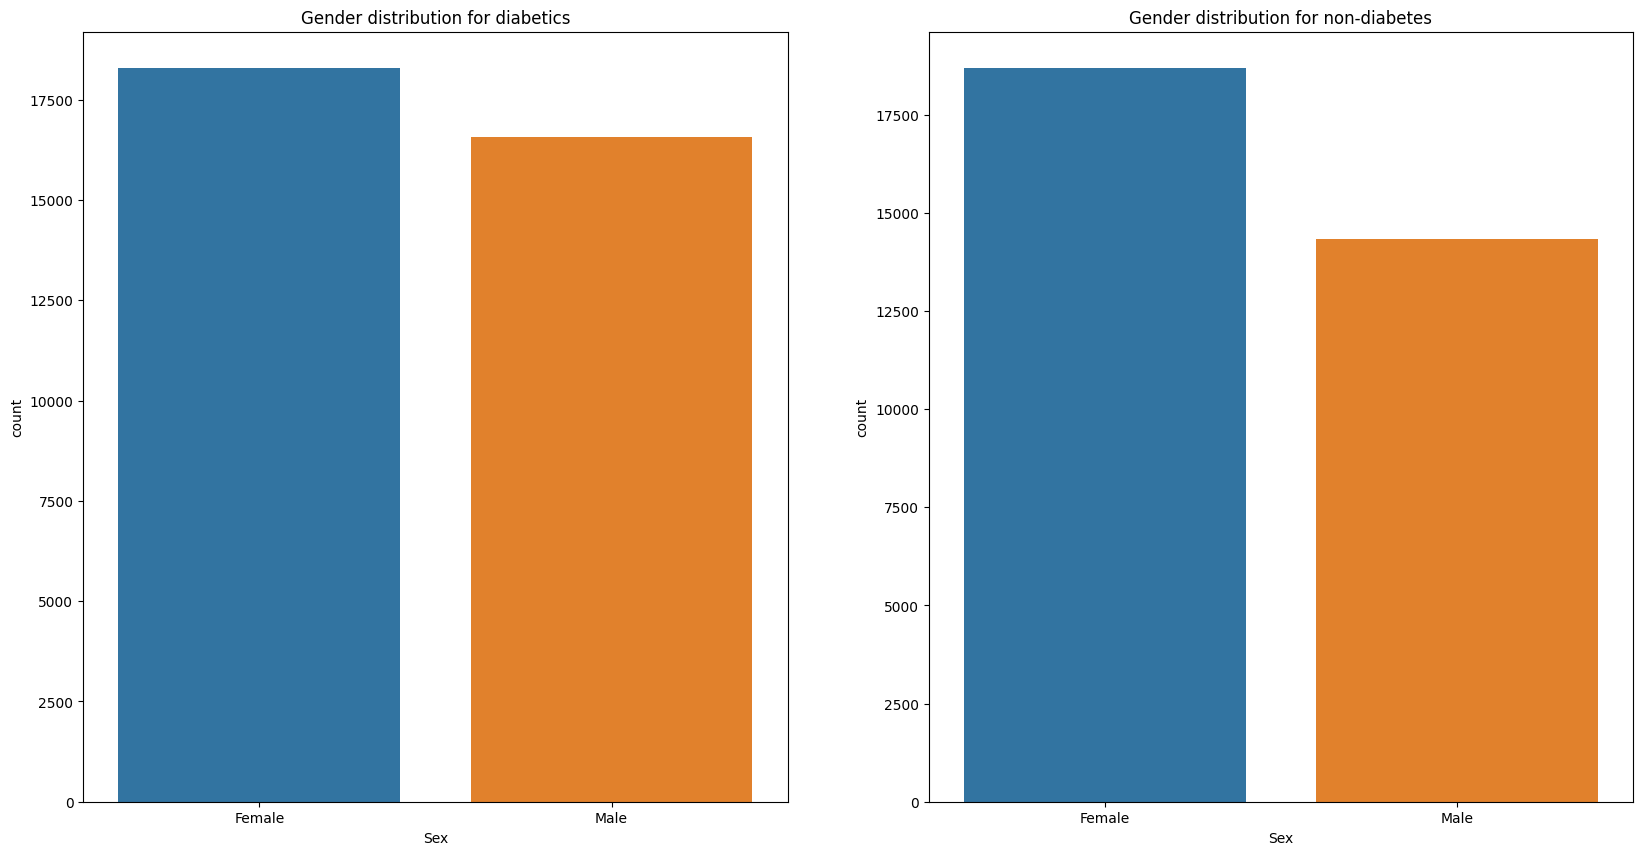

In [ ]:
# gender distribution charts

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))

ax1 = sns.countplot(data = diabetes_df, x = 'Sex', ax = ax1)
ax1.set(title = 'Gender distribution for diabetics')
ax1.set_xticklabels(['Female', 'Male'])

ax2 = sns.countplot(data = non_diabetes_df, x = 'Sex', ax = ax2)
ax2.set(title = 'Gender distribution for non-diabetes')
ax2.set_xticklabels(['Female', 'Male'])

plt.show()

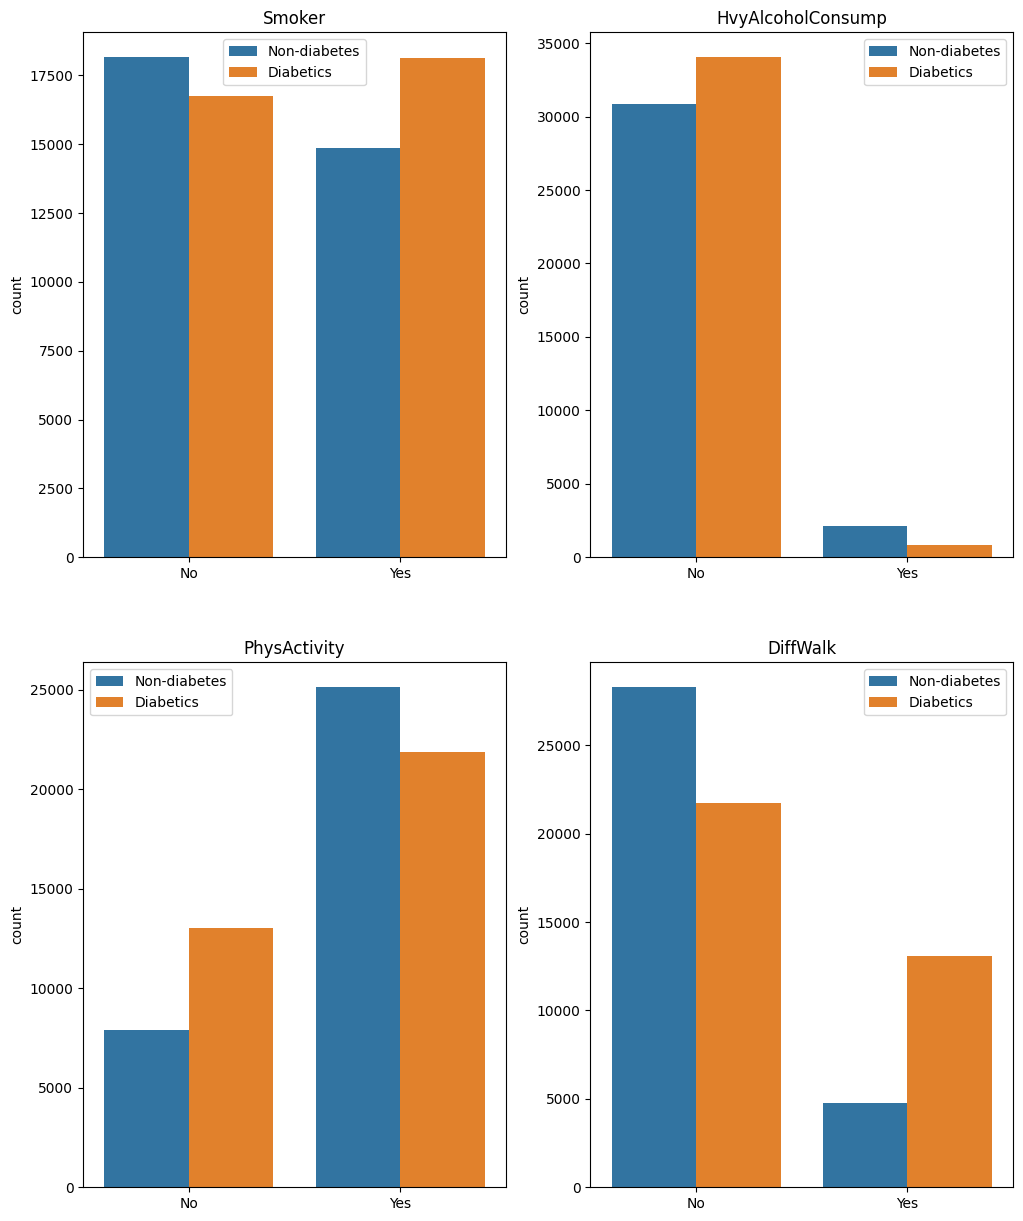

In [ ]:
#review of different characteristics

col_names = ['Smoker', 'HvyAlcoholConsump', 'PhysActivity', 'DiffWalk']
a = 2 #number of rows
b = 2 #number of columns
c = 1 #plot counter

fig = plt.figure(figsize = (12,15))
for i in col_names:
    plt.subplot(a, b, c)
    ax = sns.countplot(data = diabetes_health_indicator, x = i, hue = 'Diabetes_binary')
    ax.set(title = '{}'.format(i))
    ax.set(xlabel = None)
    ax.set_xticklabels(['No', 'Yes'])
    ax.legend(['Non-diabetes', 'Diabetics'])
    c = c + 1

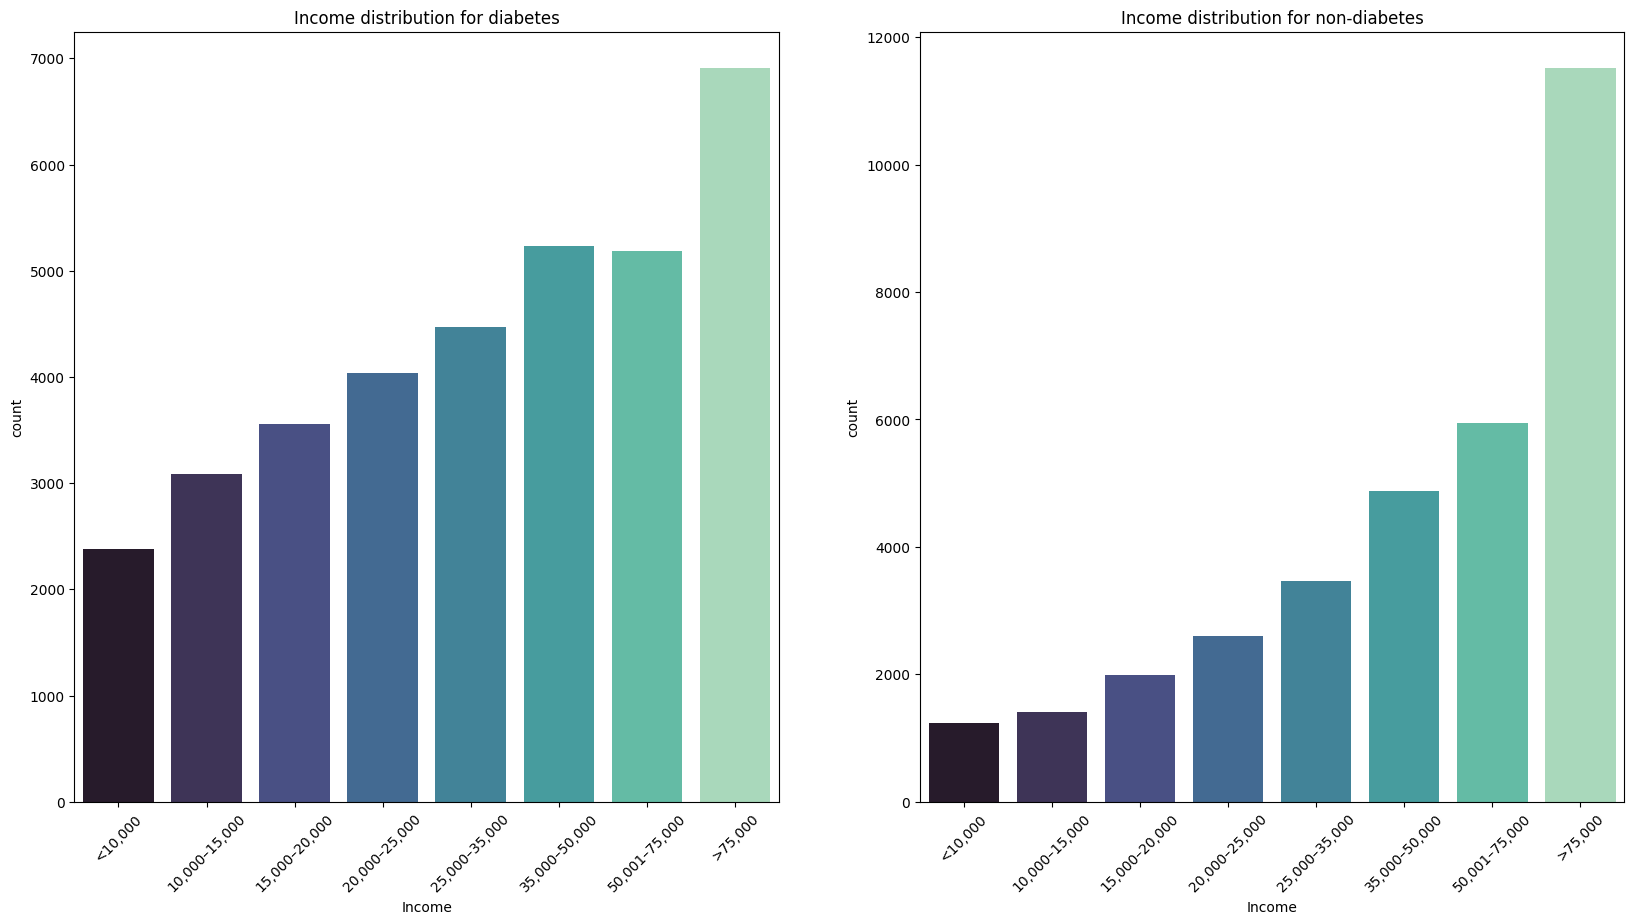

In [ ]:
#income distribution charts
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))

ax1 = sns.countplot(data = diabetes_df, x = 'Income', palette = 'mako', ax = ax1)
ax1.set(title= 'Income distribution for diabetes')
ax1.set_xticklabels(['<10,000', '10,000–15,000', '15,000–20,000', 
                 '20,000–25,000', '25,000–35,000', '35,000–50,000', 
                 '50,001–75,000', '>75,000'], rotation = 45)

ax2 = sns.countplot(data = non_diabetes_df, x = 'Income', palette = 'mako', ax = ax2)
ax2.set(title= 'Income distribution for non-diabetes')
ax2.set_xticklabels(['<10,000', '10,000–15,000', '15,000–20,000', 
                 '20,000–25,000', '25,000–35,000', '35,000–50,000', 
                 '50,001–75,000', '>75,000'], rotation = 45)

plt.show()

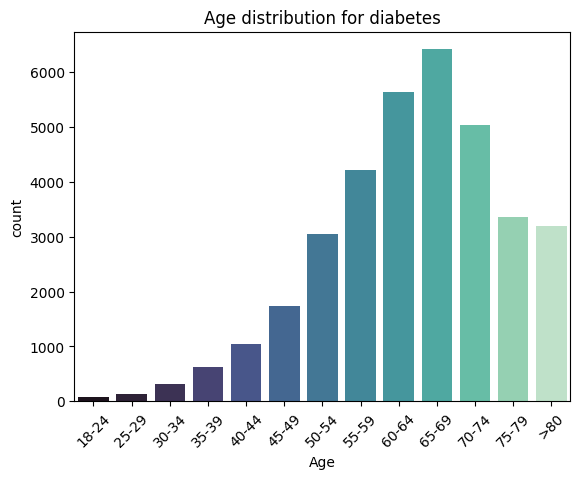

In [ ]:
#age distribution
ax = sns.countplot(data = diabetes_df, x = 'Age', palette = 'mako')
ax.set(title = 'Age distribution for diabetes')
ax.set_xticklabels(['18-24', '25-29', '30-34', '35-39', 
                    '40-44', '45-49', '50-54', '55-59', 
                    '60-64', '65-69', '70-74', '75-79', '>80'], rotation = 45)
plt.show()

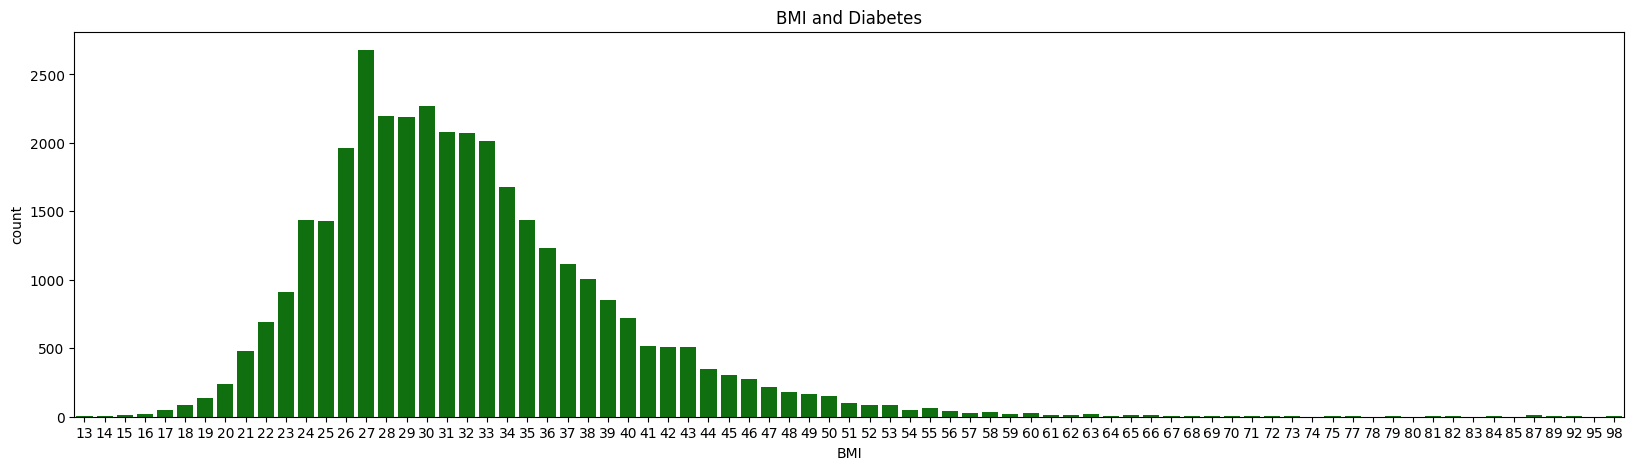

In [ ]:
# BMI 

plt.figure(figsize = (20,5))

sns.countplot(data = diabetes_df, x = 'BMI', color="g", label = "Diabetes")
plt.title("BMI and Diabetes")

plt.show()

Begin Machine Learning  - Move to Project4_Working 2Final.ipynb
